In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [8]:
data['Genre'] = pd.get_dummies(data['Genre'],drop_first=True)

In [9]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [25]:
X = data.iloc[:,[2,3]].values

In [17]:
X.shape

(200, 2)

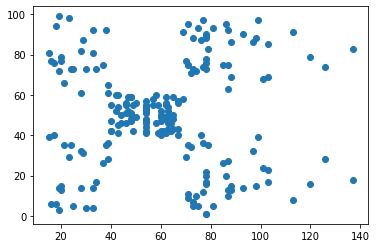

In [13]:
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values)
plt.show()

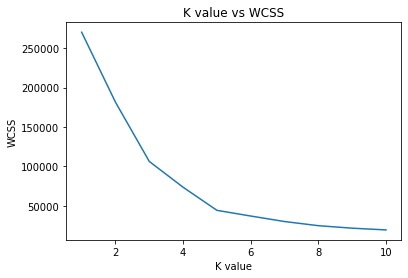

In [27]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('K value vs WCSS')
plt.show()

In [28]:
model = KMeans(n_clusters=5,random_state=0)
#model.fit(X)
y_pred = model.fit_predict(X)
print(y_pred)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [14]:
colors = ['red','green','blue','orange','yellow']

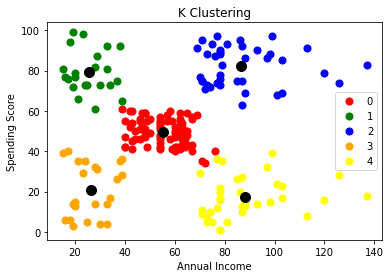

In [30]:
for i in range(5):
    #print(X[y_pred==i,0])
    plt.scatter(X[y_pred==i,0],X[y_pred==i,1],s = 50,c=colors[i])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100, color='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K Clustering')
plt.legend(range(5))
plt.show()